In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv('dengue_e.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

FileNotFoundError: [Errno 2] File b'dengue_e.csv' does not exist: b'dengue_e.csv'

In [2]:
data['caso_internacao'].value_counts()

NameError: name 'data' is not defined

In [ ]:
count_goods = len(data[data['caso_internacao']==0])
count_bads = len(data[data['caso_internacao']==1])

pct_of_bads= count_bads/(count_bads+count_goods)
print("percentage of bads is", pct_of_bads*100)
pct_of_good = count_goods/(count_bads+count_goods)
print("percentage of subscription", pct_of_good*100)

In [5]:
cat_vars=['tp_sexo', 'tp_escolaridade', 'tp_evolucao_caso']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
    
cat_vars=['tp_sexo', 'tp_escolaridade', 'tp_evolucao_caso']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=data[to_keep]
data_final.columns.values

array(['tp_gestante', 'tp_raca_cor', 'co_bairro_residencia',
       'tp_classificacao_final', 'febre', 'mialgia', 'cefaleia',
       'exantema', 'vomito', 'nausea', 'dor_costas', 'conjutivite',
       'artrite', 'artralgia', 'petequia_n', 'leucopenia', 'laco',
       'dor_retro', 'diabetes', 'hematolog', 'hepatopat', 'renal',
       'hipertensao', 'acido_pept', 'auto_imune', 'notificao_dias',
       'idade', 'caso_internacao', 'tp_sexo_F', 'tp_sexo_I', 'tp_sexo_M',
       'tp_escolaridade_0', 'tp_escolaridade_1', 'tp_escolaridade_2',
       'tp_escolaridade_3', 'tp_escolaridade_4', 'tp_escolaridade_5',
       'tp_escolaridade_6', 'tp_escolaridade_7', 'tp_escolaridade_8',
       'tp_escolaridade_9', 'tp_escolaridade_10', 'tp_evolucao_caso_1',
       'tp_evolucao_caso_2', 'tp_evolucao_caso_3', 'tp_evolucao_caso_4',
       'tp_evolucao_caso_9'], dtype=object)

In [6]:
data_final = data_final.drop("co_bairro_residencia", axis = 1)
X = data_final.loc[:, data_final.columns != 'caso_internacao']
y = data_final.loc[:, data_final.columns == 'caso_internacao']

In [7]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['caso_internacao'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of goods in oversampled data",len(os_data_y[os_data_y['caso_internacao']==0]))
print("Number of bads",len(os_data_y[os_data_y['caso_internacao']==1]))
print("Proportion of goods data in oversampled data is ",len(os_data_y[os_data_y['caso_internacao']==0])/len(os_data_X))
print("Proportion of bads data in oversampled data is ",len(os_data_y[os_data_y['caso_internacao']==1])/len(os_data_X))

C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  68310
Number of goods in oversampled data 34155
Number of bads 34155
Proportion of goods data in oversampled data is  0.5
Proportion of bads data in oversampled data is  0.5


In [8]:
data_final_vars=data_final.columns.values.tolist()
y=['caso_internacao']
X=[i for i in data_final_vars if i not in y]

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[False False False  True  True False False False False False  True False
  True  True  True  True False  True False False False  True False  True
 False False  True  True  True  True  True False False False False False
 False False False False  True  True  True  True  True]
[17 23  7  1  1 12  5 10 11 19  1  2  1  1  1  1 25  1  6 21 24  1 16  1
 26 22  1  1  1  1  1  4 14  8  3 13  9 18 15 20  1  1  1  1  1]


In [87]:
# print(rfe.support_[52])
# print (os_data_X.columns[52])
# print(rfe.support_)

IndexError: index 52 is out of bounds for axis 0 with size 41

In [9]:
import statsmodels.api as sm
logit_model=sm.Logit(os_data_y['caso_internacao'],os_data_X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.477396
         Iterations: 35
                                     Results: Logit
Model:                       Logit                   Pseudo R-squared:        0.311     
Dependent Variable:          caso_internacao         AIC:                     65307.8053
Date:                        2019-06-27 08:53        BIC:                     65700.4732
No. Observations:            68310                   Log-Likelihood:          -32611.   
Df Model:                    42                      LL-Null:                 -47349.   
Df Residuals:                68267                   LLR p-value:             0.0000    
Converged:                   0.0000                  Scale:                   1.0000    
No. Iterations:              35.0000                                                    
----------------------------------------------------------------------------------------
                         Coef.     Std.Err.      z     P>|z|      [0.025       0.

C:\Users\bruno\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\bruno\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\bruno\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\bruno\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X = os_data_X
y = os_data_y['caso_internacao']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7784 2389]
 [2273 8047]]


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     10173
           1       0.77      0.78      0.78     10320

   micro avg       0.77      0.77      0.77     20493
   macro avg       0.77      0.77      0.77     20493
weighted avg       0.77      0.77      0.77     20493



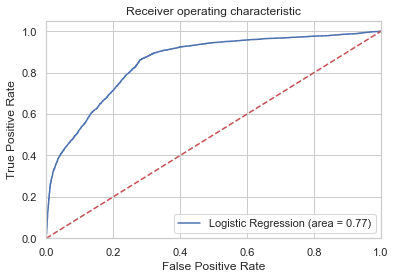

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()